### Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv('coe_data.csv')
df.head()

,ValuationDate,IndustryName,GrossFinancialDebt,AssetBeta,Debt-to-EquityRatio,SizePremium
0,31/12/2023,Real Estate (General/Diversified),515.8,0.45,0.3188,0.0118
1,31/12/2023,Publishing & Newspapers,224.4,0.77,0.3248,0.0244
2,31/12/2023,Apparel,151.2,0.87,0.4876,0.0637
3,31/12/2023,Household Products,178.2,0.75,0.1656,0.0215
4,31/12/2023,Business & Consumer Services,86.3,0.90,0.1794,0.0465


In [2]:
df.tail()

,ValuationDate,IndustryName,GrossFinancialDebt,AssetBeta,Debt-to-EquityRatio,SizePremium
89,31/12/2023,Software (Entertainment),24.5,1.08,0.0315,0.0244
90,31/12/2023,Computers/Peripherals,7.6,1.08,0.0609,0.1099
91,31/12/2023,Retail (General),35.8,1.13,0.1342,0.1099
92,31/12/2023,Healthcare Support Services,291.0,0.86,0.2686,0.0215
93,31/12/2023,Software (Internet),13.1,1.48,0.1198,0.1099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ValuationDate        94 non-null     object 
 1   IndustryName         94 non-null     object 
 2   GrossFinancialDebt   94 non-null     float64
 3   AssetBeta            94 non-null     float64
 4   Debt-to-EquityRatio  94 non-null     float64
 5   SizePremium          94 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB


In [4]:
df.describe()

,GrossFinancialDebt,AssetBeta,Debt-to-EquityRatio,SizePremium
count,94.000000,94.000000,94.000000,94.000000
mean,436.292553,0.832021,0.495726,0.043330
std,656.804110,0.295106,0.562982,0.033715
min,2.400000,0.240000,0.031500,0.011800
25%,114.700000,0.652500,0.185275,0.021500
50%,231.400000,0.820000,0.314500,0.024400
75%,502.750000,1.000000,0.550225,0.063700
max,4707.700000,1.690000,3.540600,0.109900


### Data Visualization

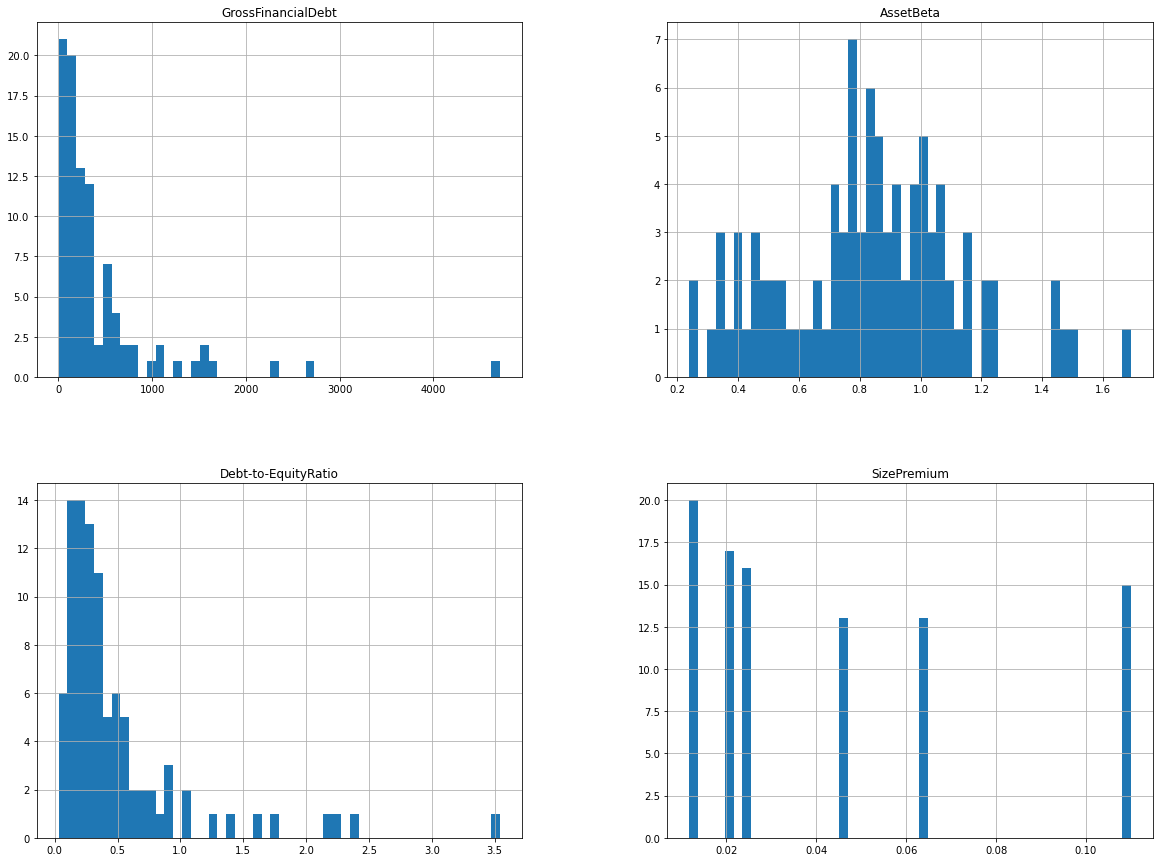

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

### First 1 — Estimating Equity Betas

In [6]:
df1 = df.copy()
df1.drop(df1.columns[[2,5]], axis=1, inplace=True)
df1.rename(columns={"AssetBeta": "βassets", "Debt-to-EquityRatio": "D/E"}, inplace=True)
df1

,ValuationDate,IndustryName,βassets,D/E
0,31/12/2023,Real Estate (General/Diversified),0.45,0.3188
1,31/12/2023,Publishing & Newspapers,0.77,0.3248
2,31/12/2023,Apparel,0.87,0.4876
3,31/12/2023,Household Products,0.75,0.1656
4,31/12/2023,Business & Consumer Services,0.90,0.1794
...,...,...,...,...
89,31/12/2023,Software (Entertainment),1.08,0.0315
90,31/12/2023,Computers/Peripherals,1.08,0.0609
91,31/12/2023,Retail (General),1.13,0.1342
92,31/12/2023,Healthcare Support Services,0.86,0.2686


In [7]:
df1["T"] = 0.23
df1

,ValuationDate,IndustryName,βassets,D/E,T
0,31/12/2023,Real Estate (General/Diversified),0.45,0.3188,0.23
1,31/12/2023,Publishing & Newspapers,0.77,0.3248,0.23
2,31/12/2023,Apparel,0.87,0.4876,0.23
3,31/12/2023,Household Products,0.75,0.1656,0.23
4,31/12/2023,Business & Consumer Services,0.90,0.1794,0.23
...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),1.08,0.0315,0.23
90,31/12/2023,Computers/Peripherals,1.08,0.0609,0.23
91,31/12/2023,Retail (General),1.13,0.1342,0.23
92,31/12/2023,Healthcare Support Services,0.86,0.2686,0.23


In [8]:
df1["βequity"] = df1["βassets"]*(1+(1-df1["T"])*df1["D/E"])
df1

,ValuationDate,IndustryName,βassets,D/E,T,βequity
0,31/12/2023,Real Estate (General/Diversified),0.45,0.3188,0.23,0.560464
1,31/12/2023,Publishing & Newspapers,0.77,0.3248,0.23,0.962574
2,31/12/2023,Apparel,0.87,0.4876,0.23,1.196643
3,31/12/2023,Household Products,0.75,0.1656,0.23,0.845634
4,31/12/2023,Business & Consumer Services,0.90,0.1794,0.23,1.024324
...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),1.08,0.0315,0.23,1.106195
90,31/12/2023,Computers/Peripherals,1.08,0.0609,0.23,1.130644
91,31/12/2023,Retail (General),1.13,0.1342,0.23,1.246767
92,31/12/2023,Healthcare Support Services,0.86,0.2686,0.23,1.037867


### First 2 — Estimating Debt Betas

In [9]:
df2 = df1.copy()
df2.drop(df2.columns[[4]], axis=1, inplace=True)
df2

,ValuationDate,IndustryName,βassets,D/E,βequity
0,31/12/2023,Real Estate (General/Diversified),0.45,0.3188,0.560464
1,31/12/2023,Publishing & Newspapers,0.77,0.3248,0.962574
2,31/12/2023,Apparel,0.87,0.4876,1.196643
3,31/12/2023,Household Products,0.75,0.1656,0.845634
4,31/12/2023,Business & Consumer Services,0.90,0.1794,1.024324
...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),1.08,0.0315,1.106195
90,31/12/2023,Computers/Peripherals,1.08,0.0609,1.130644
91,31/12/2023,Retail (General),1.13,0.1342,1.246767
92,31/12/2023,Healthcare Support Services,0.86,0.2686,1.037867


In [10]:
df2["βdebt"] = ((1+df2["D/E"])*df2["βassets"]-df2["βequity"])/(df2["D/E"])
df2

,ValuationDate,IndustryName,βassets,D/E,βequity,βdebt
0,31/12/2023,Real Estate (General/Diversified),0.45,0.3188,0.560464,0.1035
1,31/12/2023,Publishing & Newspapers,0.77,0.3248,0.962574,0.1771
2,31/12/2023,Apparel,0.87,0.4876,1.196643,0.2001
3,31/12/2023,Household Products,0.75,0.1656,0.845634,0.1725
4,31/12/2023,Business & Consumer Services,0.90,0.1794,1.024324,0.2070
...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),1.08,0.0315,1.106195,0.2484
90,31/12/2023,Computers/Peripherals,1.08,0.0609,1.130644,0.2484
91,31/12/2023,Retail (General),1.13,0.1342,1.246767,0.2599
92,31/12/2023,Healthcare Support Services,0.86,0.2686,1.037867,0.1978


### Step 3 — Estimating Size Premiums

In [11]:
df3 = df.copy()
df3.drop(df3.columns[[3,5]], axis=1, inplace=True)
df3.rename(columns={"GrossFinancialDebt": "D", "Debt-to-EquityRatio": "D/E"}, inplace=True)
df3

,ValuationDate,IndustryName,D,D/E
0,31/12/2023,Real Estate (General/Diversified),515.8,0.3188
1,31/12/2023,Publishing & Newspapers,224.4,0.3248
2,31/12/2023,Apparel,151.2,0.4876
3,31/12/2023,Household Products,178.2,0.1656
4,31/12/2023,Business & Consumer Services,86.3,0.1794
...,...,...,...,...
89,31/12/2023,Software (Entertainment),24.5,0.0315
90,31/12/2023,Computers/Peripherals,7.6,0.0609
91,31/12/2023,Retail (General),35.8,0.1342
92,31/12/2023,Healthcare Support Services,291.0,0.2686


In [12]:
df3["MarketCapitalization"] = df3["D"]/df3["D/E"]
df3 

,ValuationDate,IndustryName,D,D/E,MarketCapitalization
0,31/12/2023,Real Estate (General/Diversified),515.8,0.3188,1617.942284
1,31/12/2023,Publishing & Newspapers,224.4,0.3248,690.886700
2,31/12/2023,Apparel,151.2,0.4876,310.090238
3,31/12/2023,Household Products,178.2,0.1656,1076.086957
4,31/12/2023,Business & Consumer Services,86.3,0.1794,481.047938
...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),24.5,0.0315,777.777778
90,31/12/2023,Computers/Peripherals,7.6,0.0609,124.794745
91,31/12/2023,Retail (General),35.8,0.1342,266.766021
92,31/12/2023,Healthcare Support Services,291.0,0.2686,1083.395383


In [13]:
df3["RPs"] = df["SizePremium"]
df3

,ValuationDate,IndustryName,D,D/E,MarketCapitalization,RPs
0,31/12/2023,Real Estate (General/Diversified),515.8,0.3188,1617.942284,0.0118
1,31/12/2023,Publishing & Newspapers,224.4,0.3248,690.886700,0.0244
2,31/12/2023,Apparel,151.2,0.4876,310.090238,0.0637
3,31/12/2023,Household Products,178.2,0.1656,1076.086957,0.0215
4,31/12/2023,Business & Consumer Services,86.3,0.1794,481.047938,0.0465
...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),24.5,0.0315,777.777778,0.0244
90,31/12/2023,Computers/Peripherals,7.6,0.0609,124.794745,0.1099
91,31/12/2023,Retail (General),35.8,0.1342,266.766021,0.1099
92,31/12/2023,Healthcare Support Services,291.0,0.2686,1083.395383,0.0215


### Step 4 — Estimating COCEC

In [14]:
df4 = df1.copy()
df4["Rf"] = 0.0178
df4.drop(df4.columns[[2,3,4,5]], axis=1, inplace=True)
df4

,ValuationDate,IndustryName,Rf
0,31/12/2023,Real Estate (General/Diversified),0.0178
1,31/12/2023,Publishing & Newspapers,0.0178
2,31/12/2023,Apparel,0.0178
3,31/12/2023,Household Products,0.0178
4,31/12/2023,Business & Consumer Services,0.0178
...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178
90,31/12/2023,Computers/Peripherals,0.0178
91,31/12/2023,Retail (General),0.0178
92,31/12/2023,Healthcare Support Services,0.0178


In [15]:
df4["βequity"] = df2["βequity"]
df4

,ValuationDate,IndustryName,Rf,βequity
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.560464
1,31/12/2023,Publishing & Newspapers,0.0178,0.962574
2,31/12/2023,Apparel,0.0178,1.196643
3,31/12/2023,Household Products,0.0178,0.845634
4,31/12/2023,Business & Consumer Services,0.0178,1.024324
...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.106195
90,31/12/2023,Computers/Peripherals,0.0178,1.130644
91,31/12/2023,Retail (General),0.0178,1.246767
92,31/12/2023,Healthcare Support Services,0.0178,1.037867


In [16]:
df4["RPm"] = 0.0515
df4

,ValuationDate,IndustryName,Rf,βequity,RPm
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.560464,0.0515
1,31/12/2023,Publishing & Newspapers,0.0178,0.962574,0.0515
2,31/12/2023,Apparel,0.0178,1.196643,0.0515
3,31/12/2023,Household Products,0.0178,0.845634,0.0515
4,31/12/2023,Business & Consumer Services,0.0178,1.024324,0.0515
...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.106195,0.0515
90,31/12/2023,Computers/Peripherals,0.0178,1.130644,0.0515
91,31/12/2023,Retail (General),0.0178,1.246767,0.0515
92,31/12/2023,Healthcare Support Services,0.0178,1.037867,0.0515


In [17]:
df4["RPs"] = df3["RPs"]
df4

,ValuationDate,IndustryName,Rf,βequity,RPm,RPs
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.560464,0.0515,0.0118
1,31/12/2023,Publishing & Newspapers,0.0178,0.962574,0.0515,0.0244
2,31/12/2023,Apparel,0.0178,1.196643,0.0515,0.0637
3,31/12/2023,Household Products,0.0178,0.845634,0.0515,0.0215
4,31/12/2023,Business & Consumer Services,0.0178,1.024324,0.0515,0.0465
...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.106195,0.0515,0.0244
90,31/12/2023,Computers/Peripherals,0.0178,1.130644,0.0515,0.1099
91,31/12/2023,Retail (General),0.0178,1.246767,0.0515,0.1099
92,31/12/2023,Healthcare Support Services,0.0178,1.037867,0.0515,0.0215


In [18]:
df4["Kequity"] = df4["Rf"]+df4["βequity"]*df4["RPm"]+df4["RPs"]
df4

,ValuationDate,IndustryName,Rf,βequity,RPm,RPs,Kequity
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.560464,0.0515,0.0118,0.058464
1,31/12/2023,Publishing & Newspapers,0.0178,0.962574,0.0515,0.0244,0.091773
2,31/12/2023,Apparel,0.0178,1.196643,0.0515,0.0637,0.143127
3,31/12/2023,Household Products,0.0178,0.845634,0.0515,0.0215,0.082850
4,31/12/2023,Business & Consumer Services,0.0178,1.024324,0.0515,0.0465,0.117053
...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.106195,0.0515,0.0244,0.099169
90,31/12/2023,Computers/Peripherals,0.0178,1.130644,0.0515,0.1099,0.185928
91,31/12/2023,Retail (General),0.0178,1.246767,0.0515,0.1099,0.191909
92,31/12/2023,Healthcare Support Services,0.0178,1.037867,0.0515,0.0215,0.092750


### Step 5 — Estimating COFDC

In [19]:
df5 = df1.copy()
df5["Rf"] = 0.0178
df5.drop(df5.columns[[2,3,4,5]], axis=1, inplace=True)
df5

,ValuationDate,IndustryName,Rf
0,31/12/2023,Real Estate (General/Diversified),0.0178
1,31/12/2023,Publishing & Newspapers,0.0178
2,31/12/2023,Apparel,0.0178
3,31/12/2023,Household Products,0.0178
4,31/12/2023,Business & Consumer Services,0.0178
...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178
90,31/12/2023,Computers/Peripherals,0.0178
91,31/12/2023,Retail (General),0.0178
92,31/12/2023,Healthcare Support Services,0.0178


In [20]:
df5["βdebt"] = df2["βdebt"]
df5

,ValuationDate,IndustryName,Rf,βdebt
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.1035
1,31/12/2023,Publishing & Newspapers,0.0178,0.1771
2,31/12/2023,Apparel,0.0178,0.2001
3,31/12/2023,Household Products,0.0178,0.1725
4,31/12/2023,Business & Consumer Services,0.0178,0.2070
...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,0.2484
90,31/12/2023,Computers/Peripherals,0.0178,0.2484
91,31/12/2023,Retail (General),0.0178,0.2599
92,31/12/2023,Healthcare Support Services,0.0178,0.1978


In [21]:
df5["RPm"] = df4["RPm"]
df5

,ValuationDate,IndustryName,Rf,βdebt,RPm
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.1035,0.0515
1,31/12/2023,Publishing & Newspapers,0.0178,0.1771,0.0515
2,31/12/2023,Apparel,0.0178,0.2001,0.0515
3,31/12/2023,Household Products,0.0178,0.1725,0.0515
4,31/12/2023,Business & Consumer Services,0.0178,0.2070,0.0515
...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,0.2484,0.0515
90,31/12/2023,Computers/Peripherals,0.0178,0.2484,0.0515
91,31/12/2023,Retail (General),0.0178,0.2599,0.0515
92,31/12/2023,Healthcare Support Services,0.0178,0.1978,0.0515


In [22]:
df5["RPs"] = df4["RPs"]
df5

,ValuationDate,IndustryName,Rf,βdebt,RPm,RPs
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.1035,0.0515,0.0118
1,31/12/2023,Publishing & Newspapers,0.0178,0.1771,0.0515,0.0244
2,31/12/2023,Apparel,0.0178,0.2001,0.0515,0.0637
3,31/12/2023,Household Products,0.0178,0.1725,0.0515,0.0215
4,31/12/2023,Business & Consumer Services,0.0178,0.2070,0.0515,0.0465
...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,0.2484,0.0515,0.0244
90,31/12/2023,Computers/Peripherals,0.0178,0.2484,0.0515,0.1099
91,31/12/2023,Retail (General),0.0178,0.2599,0.0515,0.1099
92,31/12/2023,Healthcare Support Services,0.0178,0.1978,0.0515,0.0215


In [23]:
df5["Kequity"] = df4["Kequity"]
df5

,ValuationDate,IndustryName,Rf,βdebt,RPm,RPs,Kequity
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.1035,0.0515,0.0118,0.058464
1,31/12/2023,Publishing & Newspapers,0.0178,0.1771,0.0515,0.0244,0.091773
2,31/12/2023,Apparel,0.0178,0.2001,0.0515,0.0637,0.143127
3,31/12/2023,Household Products,0.0178,0.1725,0.0515,0.0215,0.082850
4,31/12/2023,Business & Consumer Services,0.0178,0.2070,0.0515,0.0465,0.117053
...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,0.2484,0.0515,0.0244,0.099169
90,31/12/2023,Computers/Peripherals,0.0178,0.2484,0.0515,0.1099,0.185928
91,31/12/2023,Retail (General),0.0178,0.2599,0.0515,0.1099,0.191909
92,31/12/2023,Healthcare Support Services,0.0178,0.1978,0.0515,0.0215,0.092750


In [24]:
df5["Kpolanitzer"] = 1.30*(df5["Rf"]+df5["βdebt"]*df5["RPm"]+df5["RPs"])
df5

,ValuationDate,IndustryName,Rf,βdebt,RPm,RPs,Kequity,Kpolanitzer
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.1035,0.0515,0.0118,0.058464,0.045409
1,31/12/2023,Publishing & Newspapers,0.0178,0.1771,0.0515,0.0244,0.091773,0.066717
2,31/12/2023,Apparel,0.0178,0.2001,0.0515,0.0637,0.143127,0.119347
3,31/12/2023,Household Products,0.0178,0.1725,0.0515,0.0215,0.082850,0.062639
4,31/12/2023,Business & Consumer Services,0.0178,0.2070,0.0515,0.0465,0.117053,0.097449
...,...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,0.2484,0.0515,0.0244,0.099169,0.071490
90,31/12/2023,Computers/Peripherals,0.0178,0.2484,0.0515,0.1099,0.185928,0.182640
91,31/12/2023,Retail (General),0.0178,0.2599,0.0515,0.1099,0.191909,0.183410
92,31/12/2023,Healthcare Support Services,0.0178,0.1978,0.0515,0.0215,0.092750,0.064333


In [25]:
import numpy as np
df5["Kdebt"] = np.min([df5["Kpolanitzer"],df5["Kequity"]], axis=0) 
df5

,ValuationDate,IndustryName,Rf,βdebt,RPm,RPs,Kequity,Kpolanitzer,Kdebt
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.1035,0.0515,0.0118,0.058464,0.045409,0.045409
1,31/12/2023,Publishing & Newspapers,0.0178,0.1771,0.0515,0.0244,0.091773,0.066717,0.066717
2,31/12/2023,Apparel,0.0178,0.2001,0.0515,0.0637,0.143127,0.119347,0.119347
3,31/12/2023,Household Products,0.0178,0.1725,0.0515,0.0215,0.082850,0.062639,0.062639
4,31/12/2023,Business & Consumer Services,0.0178,0.2070,0.0515,0.0465,0.117053,0.097449,0.097449
...,...,...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,0.2484,0.0515,0.0244,0.099169,0.071490,0.071490
90,31/12/2023,Computers/Peripherals,0.0178,0.2484,0.0515,0.1099,0.185928,0.182640,0.182640
91,31/12/2023,Retail (General),0.0178,0.2599,0.0515,0.1099,0.191909,0.183410,0.183410
92,31/12/2023,Healthcare Support Services,0.0178,0.1978,0.0515,0.0215,0.092750,0.064333,0.064333


### Step 6 — Estimating COOCS

In [26]:
df6 = df1.copy()
df6["Rf"] = 0.0178
df6.drop(df6.columns[[2,3,4,5]], axis=1, inplace=True)
df6

,ValuationDate,IndustryName,Rf
0,31/12/2023,Real Estate (General/Diversified),0.0178
1,31/12/2023,Publishing & Newspapers,0.0178
2,31/12/2023,Apparel,0.0178
3,31/12/2023,Household Products,0.0178
4,31/12/2023,Business & Consumer Services,0.0178
...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178
90,31/12/2023,Computers/Peripherals,0.0178
91,31/12/2023,Retail (General),0.0178
92,31/12/2023,Healthcare Support Services,0.0178


In [27]:
df6["βassets"] = df2["βassets"]
df6

,ValuationDate,IndustryName,Rf,βassets
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45
1,31/12/2023,Publishing & Newspapers,0.0178,0.77
2,31/12/2023,Apparel,0.0178,0.87
3,31/12/2023,Household Products,0.0178,0.75
4,31/12/2023,Business & Consumer Services,0.0178,0.90
...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.08
90,31/12/2023,Computers/Peripherals,0.0178,1.08
91,31/12/2023,Retail (General),0.0178,1.13
92,31/12/2023,Healthcare Support Services,0.0178,0.86


In [28]:
df6["RPm"] = df4["RPm"]
df6

,ValuationDate,IndustryName,Rf,βassets,RPm
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45,0.0515
1,31/12/2023,Publishing & Newspapers,0.0178,0.77,0.0515
2,31/12/2023,Apparel,0.0178,0.87,0.0515
3,31/12/2023,Household Products,0.0178,0.75,0.0515
4,31/12/2023,Business & Consumer Services,0.0178,0.90,0.0515
...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.08,0.0515
90,31/12/2023,Computers/Peripherals,0.0178,1.08,0.0515
91,31/12/2023,Retail (General),0.0178,1.13,0.0515
92,31/12/2023,Healthcare Support Services,0.0178,0.86,0.0515


In [29]:
df6["RPs"] = df4["RPs"]
df6

,ValuationDate,IndustryName,Rf,βassets,RPm,RPs
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45,0.0515,0.0118
1,31/12/2023,Publishing & Newspapers,0.0178,0.77,0.0515,0.0244
2,31/12/2023,Apparel,0.0178,0.87,0.0515,0.0637
3,31/12/2023,Household Products,0.0178,0.75,0.0515,0.0215
4,31/12/2023,Business & Consumer Services,0.0178,0.90,0.0515,0.0465
...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.08,0.0515,0.0244
90,31/12/2023,Computers/Peripherals,0.0178,1.08,0.0515,0.1099
91,31/12/2023,Retail (General),0.0178,1.13,0.0515,0.1099
92,31/12/2023,Healthcare Support Services,0.0178,0.86,0.0515,0.0215


In [30]:
df6["Kpolanitzer*"] = df6["Rf"]+df6["βassets"]*df6["RPm"]+df6["RPs"]
df6

,ValuationDate,IndustryName,Rf,βassets,RPm,RPs,Kpolanitzer*
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45,0.0515,0.0118,0.052775
1,31/12/2023,Publishing & Newspapers,0.0178,0.77,0.0515,0.0244,0.081855
2,31/12/2023,Apparel,0.0178,0.87,0.0515,0.0637,0.126305
3,31/12/2023,Household Products,0.0178,0.75,0.0515,0.0215,0.077925
4,31/12/2023,Business & Consumer Services,0.0178,0.90,0.0515,0.0465,0.110650
...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.08,0.0515,0.0244,0.097820
90,31/12/2023,Computers/Peripherals,0.0178,1.08,0.0515,0.1099,0.183320
91,31/12/2023,Retail (General),0.0178,1.13,0.0515,0.1099,0.185895
92,31/12/2023,Healthcare Support Services,0.0178,0.86,0.0515,0.0215,0.083590


In [31]:
df6["WACC"] = (1/(1+df3["D/E"]))*df4["Kequity"]+(1-1/(1+df3["D/E"]))*df5["Kdebt"]*(1-df1["T"])
df6

,ValuationDate,IndustryName,Rf,βassets,RPm,RPs,Kpolanitzer*,WACC
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45,0.0515,0.0118,0.052775,0.052783
1,31/12/2023,Publishing & Newspapers,0.0178,0.77,0.0515,0.0244,0.081855,0.081868
2,31/12/2023,Apparel,0.0178,0.87,0.0515,0.0637,0.126305,0.126335
3,31/12/2023,Household Products,0.0178,0.75,0.0515,0.0215,0.077925,0.077932
4,31/12/2023,Business & Consumer Services,0.0178,0.90,0.0515,0.0465,0.110650,0.110661
...,...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.08,0.0515,0.0244,0.097820,0.097822
90,31/12/2023,Computers/Peripherals,0.0178,1.08,0.0515,0.1099,0.183320,0.183328
91,31/12/2023,Retail (General),0.0178,1.13,0.0515,0.1099,0.185895,0.185912
92,31/12/2023,Healthcare Support Services,0.0178,0.86,0.0515,0.0215,0.083590,0.083600


In [32]:
import numpy as np
df6["Kassets"] = np.min([df6["Kpolanitzer*"],df6["WACC"]], axis=0) 
df6

,ValuationDate,IndustryName,Rf,βassets,RPm,RPs,Kpolanitzer*,WACC,Kassets
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45,0.0515,0.0118,0.052775,0.052783,0.052775
1,31/12/2023,Publishing & Newspapers,0.0178,0.77,0.0515,0.0244,0.081855,0.081868,0.081855
2,31/12/2023,Apparel,0.0178,0.87,0.0515,0.0637,0.126305,0.126335,0.126305
3,31/12/2023,Household Products,0.0178,0.75,0.0515,0.0215,0.077925,0.077932,0.077925
4,31/12/2023,Business & Consumer Services,0.0178,0.90,0.0515,0.0465,0.110650,0.110661,0.110650
...,...,...,...,...,...,...,...,...,...
89,31/12/2023,Software (Entertainment),0.0178,1.08,0.0515,0.0244,0.097820,0.097822,0.097820
90,31/12/2023,Computers/Peripherals,0.0178,1.08,0.0515,0.1099,0.183320,0.183328,0.183320
91,31/12/2023,Retail (General),0.0178,1.13,0.0515,0.1099,0.185895,0.185912,0.185895
92,31/12/2023,Healthcare Support Services,0.0178,0.86,0.0515,0.0215,0.083590,0.083600,0.083590


### Exporting the dataset to a CSV file

In [33]:
df6.drop(df6.columns[[6,7]], axis=1, inplace=True)
df6.to_csv('COOCS.csv', index=False, encoding='utf-8')
df7 = pd.read_csv('COOCS.csv')
df7.head()

,ValuationDate,IndustryName,Rf,βassets,RPm,RPs,Kassets
0,31/12/2023,Real Estate (General/Diversified),0.0178,0.45,0.0515,0.0118,0.052775
1,31/12/2023,Publishing & Newspapers,0.0178,0.77,0.0515,0.0244,0.081855
2,31/12/2023,Apparel,0.0178,0.87,0.0515,0.0637,0.126305
3,31/12/2023,Household Products,0.0178,0.75,0.0515,0.0215,0.077925
4,31/12/2023,Business & Consumer Services,0.0178,0.90,0.0515,0.0465,0.110650
